# How many clusters of grain?

This exercise is taken and modified from https://github.com/benjaminwilson/python-clustering-exercises

This is a class to choose a good number of clusters for a dataset using the k-means inertia graph.  You are given a dataset of the measurements of samples of grain.  What's a good number of clusters in this case?

This dataset was obtained from the [UCI](https://archive.ics.uci.edu/ml/datasets/seeds).


**Step 1:** Load the dataset _(written for you)_.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
seeds_df = pd.read_csv('C:/Users/User/Forward School/ADS/W7/Data/seeds.csv')

**Step 2:** Display the DataFrame to inspect the data.  Notice that there are 7 columns - so each grain sample (row) is a point in 7D space!  Scatter plots can't help us here.

In [29]:
seeds_df

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama wheat
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,Canadian wheat
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,Canadian wheat
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,Canadian wheat
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,Canadian wheat


In [31]:
seeds_df.describe()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [32]:
seeds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   length                 210 non-null    float64
 4   width                  210 non-null    float64
 5   asymmetry_coefficient  210 non-null    float64
 6   groove_length          210 non-null    float64
 7   grain_variety          210 non-null    object 
dtypes: float64(7), object(1)
memory usage: 13.2+ KB


**Step 3:** Display heatmap to show correlation from each columns

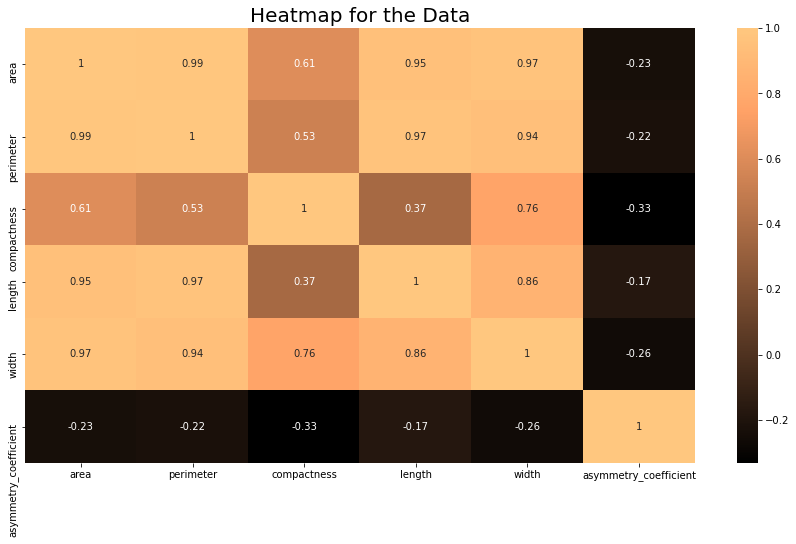

In [21]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(seeds_df.iloc[:, range(6)].corr(), cmap = 'copper', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


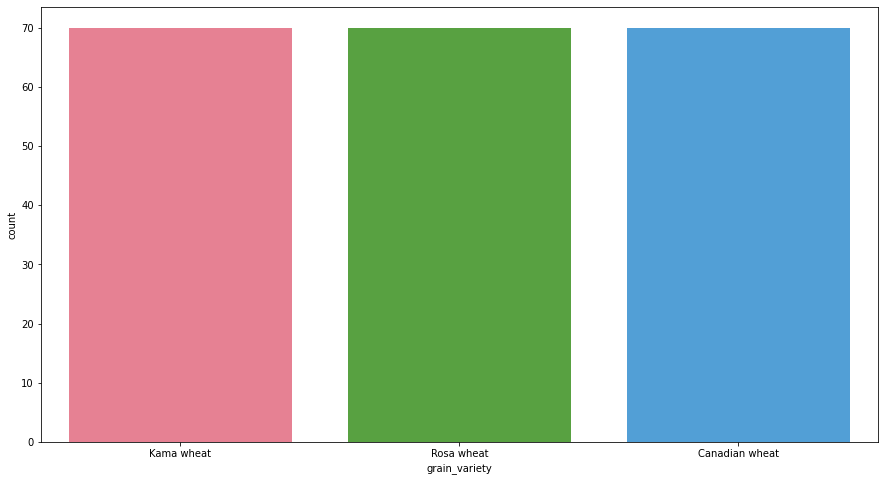

In [35]:
sns.countplot(seeds_df['grain_variety'], palette='husl')
plt.show()